$$\quad$$

이름: 최정우

학번: M2018076

Colab link: http://bit.ly/2YWnklZ

# 1. [linear algebra; 10p] 
## 훈련집합이 $x_1 = (2, 1)^T, x_1 = (2, 4)^T, x_1 = (4, 1)^T, x_1 = (4, 3)^T$ 이다.
### A. 훈련집합을 축 $(0,1)^T$과 축 $(1,1)^T$으로 투영하고, 각 축에 투영된 훈련집합의 분산들을 구하세요.



In [0]:
import numpy as np
import math

# 훈련집합 정의
x1 = np.array([[2., 1.], [2., 4.], [4., 1.], [4., 3.]]).T

print("x1:\n", x1, "\n")

# 축 정의
ax1 = np.array([0.,1.]).T
ax2 = np.array([1./math.sqrt(2),1./math.sqrt(2)]).T

# 각 축에대해 투영
proj1 = np.dot(ax1, x1)
proj2 = np.dot(ax2, x1)

# 투영된 훈련집합의 분산 계산
var1 = np.var(proj1,ddof=0)
var2 = np.var(proj2,ddof=0)

print("Project to axis 1:", proj1, "\nVar1:", var1, "\n")
print("Project to axis 2:", proj2, "\nVar2:", var2)

x1:
 [[2. 2. 4. 4.]
 [1. 4. 1. 3.]] 

Project to axis 1: [1. 4. 1. 3.] 
Var1: 1.6875 

Project to axis 2: [2.12132034 4.24264069 3.53553391 4.94974747] 
Var2: 1.0937499999999996


### B. 해당 훈련집합의 공분산 행렬을 구하세요.


In [0]:
# 공분산 행렬 계산
cov_x1 = np.cov(x1,ddof=0)
print("Covariance of x1:\n", cov_x1)

Covariance of x1:
 [[ 1.     -0.25  ]
 [-0.25    1.6875]]


### C. 구한 공분산 행렬을 고유분해를 구하세요.


In [0]:
# 공분산 행렬의 Eigendecomposition
w, v = np.linalg.eig(cov_x1)
print("Eigenvalues:\n", w)
print("Eigenvectors:\n",v)

Eigenvalues:
 [0.91870405 1.76879595]
Eigenvectors:
 [[-0.95098267  0.30924417]
 [-0.30924417 -0.95098267]]


### D. 고유분해의 가장 큰 고유값을 가지는 고유벡터를 축으로 훈련집합을 투영한 결과를 그리고, 투영된 훈련 집합의 분산을 구하세요.


투영된 훈련집합
 [-0.33249433 -3.18544234  0.28599402 -1.61597133]


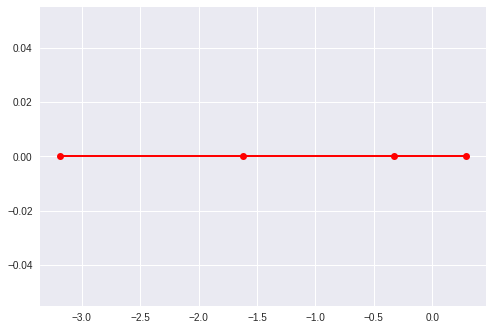

투영된 훈련집합의 분산
 1.7687959533979825


In [0]:
large_vec = v[:,np.argmax(w)] # 가장 큰 고유값을 가지는 고유벡터

# 훈련집합 투영
scalar_proj = np.dot(large_vec, x1)
print("투영된 훈련집합\n", scalar_proj)    

#직선 또는 2차원 평면에 값을 점으로 찍기
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(scalar_proj, [0,0,0,0], 'ro-')
plt.show()

# 투영된 훈련집합의 분산계산
print("투영된 훈련집합의 분산\n", np.var(scalar_proj,ddof=0))

### E. 위 A번과 D번에서 구한 분산을 비교하세요.

$$\quad$$

축 $(0,1)^T$에 투영한 훈련집합의 분산은 1.6875이고,

축 $(1,1)^T$에 투영한 훈련집합의 분산은 1.0937이다.

고유분해해서 고유값이 제일 큰 고유벡터에 투영한 훈련집합의 분산은 1.7688 이다.

가장 큰 고유값을 가지는 고유벡터로의 투영된 훈련집합의 분산은 축$(0,1)^T$과 축 $(1,1)^T$ 에 투영된 훈련 집합의 분산보다 크다.

왜냐하면 공분산행렬의 가장큰 고유값을 같는 고유벡터 로의 투영은 주성분분석(PCA) 와 같은데, 이는 기존데이터의 분산을 최대로 유지하면서 투영을 시키는 방법 이기 때문이다.

# 2. [probability; 10p] 
## 직원이 A제조사로부터 1000개의 직접회로 (IC)를, B제조사로부터 2000개의 IC를, C제조사로부터 3000개의 IC를 구매했다. IC의 불량 검사 결과, A사로부터 구매한 IC의 불량 확률은 0.05, B사로부터 구매한 IC의 불량 확률은 0.10, C사로부터 구매한 IC의 불량 확률은 0.10이었다.
### A. 만약 3개의 제조사로부터 구매한 IC가 섞여 있는 경우, 임의로 선택한 IC가 불량일 확률은 얼마인가?

$$\quad$$

A사의 불량 직접회로 수 : $0.05 * 1000 = 50$

B사의 불량 직접회로 수 : $0.10 * 2000 = 200$

C사의 불량 직접회로 수 : $0.10 * 3000 = 300$

P(F): 임의의 선택한 IC가 불량일 확률

$${P(F)} ={{number~ of~ fault~ IC} \over {Total~ number~ of~ IC}}$$

$$= {{300 + 200 + 50} \over {1000 + 2000 + 3000}}$$

$$= {550 \over 6000}$$

$$\simeq 0.0917$$




### B. 임의로 선택한 IC가 불량인 경우, 그것이 제조사 A로부터 만들어질 확률은 얼마인가?


$$\quad$$

P(F): 임의의 선택한 IC가 불량일 확률

P(A): IC가 제조사 A에서 만들어질 확률

$$ P(A|F)  = {{P(A) P(F|A)} \over{P(F)}}$$


$$ = {{\frac{1000}{6000} \frac{50}{1000} }\over{\frac{550}{6000}}}$$

$$ ={50\over 550} = {1 \over 11}$$
$$\simeq 0.0909$$

# 3. [probability; 10p] 

## K대학은 대학원생보다 2배의 학부생이 재학중이다. 대학원생의 25%가 기숙사에 살고 있고, 학부생의 10%가 기숙사에 살고 있다.

### A. 한 학생을 임의로 선정한 경우, 그 학생이 기숙사에 살고 있는 학부생일 확률은 얼마인가?


$$\quad$$

대학원생 : a 명

학부생: 2a 명

기숙하는 대학원생: 0.25a 명

기숙하는 학부생: 0.2a 명

$P(X)$ : 기숙사에 살고있는 학부생을 선택할 확률

$$P(X)  = {{number~of~ undergraduate~ student~who~ live~ in~ dormitory}\over{Total ~number~ of ~student}}$$

$$ = {{0.2a}\over{3a}} = {{2}\over{30}} \simeq 6.7\%$$

### B. 기숙사에 살고 있는 한 학생을 임의로 선정한 경우, 그 학생이 대학원생일 확률은 얼마인가?

$$\quad$$

주어진 문제는 다음과 같이 정의 할수 있다.

$P(G)$: 선택된 학생이 대학원생인 확률

$P(D)$: 선택된 학생이 기숙사에 살 확률

$P(D|G)$: 대학원생을 선택할때, 그 학생이 기숙사에 살고있을 확률 

$P(G|D)$: 기숙사에 살고있는 한 학생을 선택할때, 선택된 학생이 대학원생일 확률

$$ P(G|D)  = {{P(D|G) P(G) }\over{P(D)}}$$

$$ = {{{0.25}{a\over 3a} }\over{0.45a\over{3a}}}$$

$$ = {25 \over 45} \simeq 55.56\% $$

# 4. [numerical computation; 10p] 
## 다음의 선형 최소 제곱 함수 $f(x) = {\frac{1}{2}} ||Ax-b||^2_2$ 의 최소값을 Newton method를 이용하여 구하여라.

$$\quad$$

$let: y = Ax-b$

$$ f = {1 \over 2} ||y||_F^2 = {1 \over 2 } y : y$$

$$ df = y : dy $$

$$\qquad = y : A~dx$$

$$\qquad = A^Ty : dx $$

$$ {{\partial f}\over{\partial x}} = A^Ty ~, ~\because df = ({\partial f \over {\partial x}} : dx) $$

$$  = A^T(Ax-b) $$
 
$f(x)$가 선형 최소 제곱 함수 이므로, quadratic 함수이다.

이 때, $\nabla f=0$인 점은 어떤 초기점에서 시작하더라도,  한 번에 극점에 도달할 수있다.
 
따라서 극점의 위치를 구하면 다음과 같다.
 
$$ {{\partial f}\over{\partial x}} = A^T(Ax-b) =0 $$
 
$$\therefore x = A^{-1}b$$ 일 때 극점을 가진다.
 
하지만 여기서 $A^{-1}$은 정방행렬일때만 정의가 되므로, 일반적인 $A$에 대해 역행렬을 구할수 없다.
 
따라서 pseudo inverse $(A^\dagger)$를 이용한다.

$$\therefore x = A^{\dagger}b$$

일 때 극점을 가진다.

$$A^\dagger = (A^{T}A)^{-1}A^T$$
    
따라서 함수 $f(x)$ 의 최소값은 

$$f(x) = {{1}\over{2}} ||Ax-b||^2_2$$

$$= {{1}\over{2}} ||A(A^{\dagger}b)-b||^2_2$$

$$= {{1}\over{2}} ||A(A^{T}A)^{-1}A^T)b -b||^2_2$$

$$= {{1}\over{2}} ||AA^{-1}(A^{T})^{-1}A^Tb -b||^2_2$$

$$ = 0 $$

cf. ":" 는 Frobenius product

# 5. [numerical computation; 10p] 
## 함수 $f(x, y) = x^2-4𝑥+y^2+ 2y$의 다음을 구하세요.

### A. 함수의 최소점과 최솟값을 분석적으로 구하세요.

$$\nabla f = ({{\partial f }\over{\partial x}}, {{\partial f }\over{\partial y}})$$

$${{\partial f }\over{\partial x}} = 2x-4$$

$${{\partial f }\over{\partial y}} = 2y+2$$

최소점은 $\nabla f = 0$ 인 점에서 발생하므로 

$${{\partial f }\over{\partial x}} = 2x-4 = 0$$
$$x=2$$

$${{\partial f }\over{\partial y}} = 2y+2 = 0$$
$$y=-1$$

함수 $f$ 의 최소점은  $(2,-1)$ 이고

최솟값은 $f(2,-1)=  -5$ 이다.

### B. 이동 비율이 0.1인 경사 하강법을 통해 초기점 $(x,y) = (5,5)^T$ 에서 이동할 때 얻어지는 점들을 구하세요. (최소 3개 이상의 경로점)



In [0]:
import numpy as np

# 경사 하강법 함수 정의
def gradient_descent(x0, f, f_prime):
    x_i, y_i = x0
    all_x_i = list()
    all_y_i = list()
    all_f_i = list()

    # 경사 하강법 반복
    for i in range(1, 10):
        # 좌표 및 함수값 계산
        all_x_i.append(x_i)
        all_y_i.append(y_i)
        all_f_i.append(f(x_i, y_i))
        
        # 도함수 계산
        dx_i, dy_i = f_prime(x_i, y_i)
        
        # 이동 비율
        step = 0.1
        
        # 이동
        x_i += - step*dx_i
        y_i += - step*dy_i

    return all_x_i, all_y_i, all_f_i

# 함수 정의
def f(x_i, y_i):
    return x_i**2 - 4*x_i + y_i**2 + 2*y_i

# 함수의 도함수 정의
def f_prime(x_i, y_i):
    dx_i = 2*x_i -4
    dy_i = 2*y_i +2
    
    return dx_i, dy_i

# 초기값 5,5 설정
x0 = (5,5)

# 초기값으로 부터 경사하강법 실행
all_x, all_y, all_f = gradient_descent(x0, f, f_prime)

# 결과 출력
for idx, (x, y, f_val) in enumerate(zip(all_x, all_y, all_f)):
    print("iter:%3d, f(%.2f, %.2f) = %3.2f"%(idx+1, x, y, f_val))


iter:  1, f(5.00, 5.00) = 40.00
iter:  2, f(4.40, 3.80) = 23.80
iter:  3, f(3.92, 2.84) = 13.43
iter:  4, f(3.54, 2.07) = 6.80
iter:  5, f(3.23, 1.46) = 2.55
iter:  6, f(2.98, 0.97) = -0.17
iter:  7, f(2.79, 0.57) = -1.91
iter:  8, f(2.63, 0.26) = -3.02
iter:  9, f(2.50, 0.01) = -3.73


### C. 구한 경로점들이 분석적으로 구한 최소값으로 이동하는지 확인하세요.


코드의 계산에 따르면 반복적인 경사하강법 적용에 분석적으로 계산한 최솟값에 근접하게 도달한다.

In [0]:
import numpy as np

# 경사 하강법 함수 정의
def gradient_descent(x0, f, f_prime):
    x_i, y_i = x0
    all_x_i = list()
    all_y_i = list()
    all_f_i = list()

    # 경사 하강법 반복
    for i in range(1, 35):
        # 좌표 및 함수값 계산
        all_x_i.append(x_i)
        all_y_i.append(y_i)
        all_f_i.append(f(x_i, y_i))

        # 도함수 계산
        dx_i, dy_i = f_prime(x_i, y_i)
        
        # 이동 비율
        step = 0.1
        
        # 이동
        x_i += - step*dx_i
        y_i += - step*dy_i

    return all_x_i, all_y_i, all_f_i

# 함수 정의
def f(x_i, y_i):
    return x_i**2 - 4*x_i + y_i**2 + 2*y_i

# 도함수 정의
def f_prime(x_i, y_i):
    dx_i = 2*x_i -4
    dy_i = 2*y_i +2
    
    return dx_i, dy_i

# 초기값 정의
x0 = (5,5)
# 초기값으로 부터 경사하강법 실행
all_x, all_y, all_f = gradient_descent(x0, f, f_prime)

# 결과 출력
for idx, (x, y, f_val) in enumerate(zip(all_x, all_y, all_f)):
    print("iter:%3d, f(%.2f, %.2f) = %3.2f"%(idx+1, x, y, f_val))


iter:  1, f(5.00, 5.00) = 40.00
iter:  2, f(4.40, 3.80) = 23.80
iter:  3, f(3.92, 2.84) = 13.43
iter:  4, f(3.54, 2.07) = 6.80
iter:  5, f(3.23, 1.46) = 2.55
iter:  6, f(2.98, 0.97) = -0.17
iter:  7, f(2.79, 0.57) = -1.91
iter:  8, f(2.63, 0.26) = -3.02
iter:  9, f(2.50, 0.01) = -3.73
iter: 10, f(2.40, -0.19) = -4.19
iter: 11, f(2.32, -0.36) = -4.48
iter: 12, f(2.26, -0.48) = -4.67
iter: 13, f(2.21, -0.59) = -4.79
iter: 14, f(2.16, -0.67) = -4.86
iter: 15, f(2.13, -0.74) = -4.91
iter: 16, f(2.11, -0.79) = -4.94
iter: 17, f(2.08, -0.83) = -4.96
iter: 18, f(2.07, -0.86) = -4.98
iter: 19, f(2.05, -0.89) = -4.99
iter: 20, f(2.04, -0.91) = -4.99
iter: 21, f(2.03, -0.93) = -4.99
iter: 22, f(2.03, -0.94) = -5.00
iter: 23, f(2.02, -0.96) = -5.00
iter: 24, f(2.02, -0.96) = -5.00
iter: 25, f(2.01, -0.97) = -5.00
iter: 26, f(2.01, -0.98) = -5.00
iter: 27, f(2.01, -0.98) = -5.00
iter: 28, f(2.01, -0.99) = -5.00
iter: 29, f(2.01, -0.99) = -5.00
iter: 30, f(2.00, -0.99) = -5.00
iter: 31, f(2.00, -0.

### D. 함수를 등고선 형태로 그리고, 함수의 미분 경사도 그리세요.

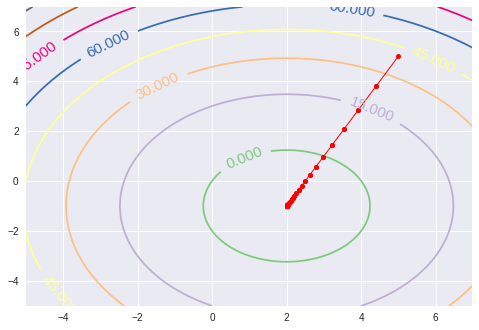

In [0]:
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

# 경사 하강법 함수 정의
def gradient_descent(x0, f, f_prime):
    x_i, y_i = x0
    all_x_i = list()
    all_y_i = list()
    all_f_i = list()

    # 경사 하강법 반복
    for i in range(1, 35):
        # 좌표 및 함수값 계산
        all_x_i.append(x_i)
        all_y_i.append(y_i)
        all_f_i.append(f(x_i, y_i))

        # 도함수 계산
        dx_i, dy_i = f_prime(x_i, y_i)
        
        # 이동 비율
        step = 0.1
        
        # 이동
        x_i += - step*dx_i
        y_i += - step*dy_i

    return all_x_i, all_y_i, all_f_i

# 함수 정의
def f(x_i, y_i):
    return x_i**2 - 4*x_i + y_i**2 + 2*y_i

# 도함수 정의
def f_prime(x_i, y_i):
    dx_i = 2*x_i -4
    dy_i = 2*y_i +2
    
    return dx_i, dy_i

# 초기값 정의
x0 = (5,5)
# 초기값으로 부터 경사하강법 실행
all_x, all_y, all_f = gradient_descent(x0, f, f_prime)

# 등고선을 그리기 위한 변수정의
delta = 0.025
x = np.arange(-5.0, 7.0, delta)
y = np.arange(-5.0, 7.0, delta)
X, Y = np.meshgrid(x, y)
# 등고선 함수 정의
f = X**2 - 4*X + Y**2 + 2*Y

fig, ax = plt.subplots()
# 등고선 플롯
CS = ax.contour(X, Y, f, cmap='Accent')
ax.clabel(CS, inline=1, fontsize=15)

# 함수의 미분 경사도 플롯
for i in range(0, len(all_x)):
    plt.plot(all_x[i:i+2], all_y[i:i+2], 'ro-', linewidth=1, markersize=5)

# 6. [numerical computation; 5p] 
## $g_0 =w_0 +2w_1 +1, g_1 =2w_0 +3w_1 -1$인$f=(g_0 +2g_1-1)^2$의 $w_0, w_1$에 대한 편미분을 구하세요.

$${{\partial f}\over{\partial{ w_0}}} = 2(g_0 + 2g_1 - 1) ({\partial g_0\over \partial w_0}+2{\partial g_1 \over \partial w_0})$$

$$ = 2(w_0 +2w_1 +1 +2(2w_0 + 3w_1-1) -1)(1 + 2(2))$$

$$ ( \because {\partial g_0\over \partial w_0} =1 , {\partial g_1 \over \partial w_0} = 2 )$$

$$ = 10 (w_0 +2w_1 +4w_0 + 6w_1-2 )$$

$$ = 10 (5w_0+ 8w_1 -2) $$

$$ = 50w_0+ 80w_1 -20 $$

$$ \therefore {{\partial f}\over{\partial{ w_0}}} = 50w_0+ 80w_1 -20 $$

$\quad$

$$ {{\partial f}\over{\partial{ w_1}}} 2(g_0 + 2g_1 - 1) ({\partial g_0\over \partial w_1}+2{\partial g_1 \over \partial w_1})$$

$$ = 2(w_0 +2w_1 +1 +2(2w_0 + 3w_1-1) -1)(2 + 2(3))$$

$$ (\because {\partial g_0\over \partial w_1} =2 , {\partial g_1 \over \partial w_1} = 3)$$

$$ = 16 (5w_0+ 8w_1 -2) $$

$$ = 80w_0 +128 w_1 - 32 $$

$$ \therefore {{\partial f}\over{\partial{ w_1}}} = 80w_0 +128 w_1 - 32 $$

# 7. [PLA; 15p] 
## PLA 가중치 갱신 법칙 $w(t + 1) = w(t) + y(t)x(t)$를 보고 다음 문제의 답을 보이세요.

### A. $y(t) w^T(t)x(t)<0$임을 보이세요. (Hint : $x(t)$는 $w(t)$에 의해 오분류 됨)

$$\quad$$

간단한 perceptron 은 다음과 같이 정의할수있다.

$$h(x)  = sign (w^T x)$$

$x(t)$ 가 $w(t)$ 에 의해 오분류 되었다 가정하자

$let~y(t) = 1$

오분류 이므로 $h(x) = -1$ 이고 $w^T(t)x(t)<0$

$$\therefore y(t)w^𝑇(t)x(t) < 0 $$

$let~y(t) = -1$

오분류 이므로 $h(x)=+1$ 이고 $w^T(t)x(t)>0$

$$\therefore y(t) w^T(t)x(t)<0$$




### B. $y(t) w^T (t + 1) x(t) > y(t) w^T(t)x(t)$ 임을 보이세요. (Hint: $w(t + 1) = w(t) + y(t)x(t)$ 이용)



$$y(t) w^T (t + 1) x(t) = y(t) (w(t) + y(t)x(t)) x(t) $$

$$ = y(t)w^T(t)x(t)+y(t)y(t)x(t)x(t)$$

$$y(t)w^T(t+1)x(t) - y(t)w^T(t)x(t) = y(t)y(t)x(t)x(t)$$

$$y(t)y(t)x(t)x(t)>0$$

$$\because x(t) \in \mathbb{R}, y(t) \in \mathbb{R}$$

$$\therefore y(t) w^T (t + 1) x(t) > y(t) w^T(t)x(t)$$


### C. $w(t)$에서 $w(t+1)$로 이동하는 것이 $x(t)$를 분류하는데 올바른 방향으로 이동함을 설명하세요.

$$\quad$$

문제는 $w(t+1) = w(t) + y(t)x(t)$에서 $y(t)x(t)$를 기존 가중치에서 더해주는 방법이 올바른 방법인지 설명하는 것이다.

오분류를 하고 있을 경우를 가정해보자.

먼저 참값이 $y = +1$ 일 때,

![](PyqPZsC.png)

위 그림을 보면 $w^T x < 0$으로 오분류를 하고있다. 이 때 $y x$의 방향으로 $w$를 이동 시켜주면
오분류를 해결할 수 있다.

다음으로 참값이 $y = -1$ 일 때,

![](n1jkTyV.png)

위 그림을 보면 $w^T x > 0$으로 오분류를 하고있다. 이 때 $yx$의 방향으로 $w$를 이동 시켜주면
오분류를 해결할 수 있다.

따라서$w(t)$에서 $w(t+1)$로 이동하는 것이 $x(t)$를 분류하는데 올바른 방향으로 이동한다.


### D. $𝐰 = [w_0,w_1,w_2]^T$이고, $𝐱 = [1,x_1,x_2]^T$인 $h(x) = sign(w^Tx)$ 일 때, $h(x) = -1$와 $h(x) = 1$는 결정 직선 $x_2 =ax_1+b$에 의해 구분된다. 결정 직선의 기울기 $a$와 절편 $b$를 가중치 $w_0,w_1,w_2$에 의해 설명하세요.

$$\quad$$

벡터의 각 요소를 풀어서 계산 해보면

$$w^Tx = w_o + w_1x_1 + w_2x_2$$

$sign()$ 함수는 0을 기준으로 -1과 +1로 값이 나오기 때문에

$$w^Tx = 0 $$

$$w_o + w_1x_1 + w_2x_2 =0 $$

$$-\frac{w_1}{w_2} x_1 - \frac{w_o}{w_2}   = x_2 $$

이 결정 직선이 된다.

이를 위의 결정 직선과 비교하면

$$a = -\frac{w_1}{w_2}$$

$$b = -\frac{w_0}{w_2}$$

이 된다.
 
 따라서 결정직선의 기울기 $a$ 는 $-\frac{w_1}{w_2}$ 이고,
 절편 $b$ 은 $-\frac{w_0}{w_2}$가 된다.

# 8. [PLA; 15p] 
## PLA는 결과적으로 선형적으로 분리를 하는 최적 가중치 $w^*$에 얻게 된다. 다음 문제의 답을 보이세요. ($w(0) = 0$임을 가정)

### A. $\rho = \min\limits_{1\leq n \leq N} {y_n(w^*x_n)}$일 때, $\rho >0$임을 보이세요. 



$$\quad$$

최적 가중치 $w^*$ 에서
$$sign(w^*x_n) = y_n$$

$$sign(\rho) = sign(\min\limits_{1\leq n \leq N} {y_n(w^*x_n)}) = \min\limits_{1\leq n\leq N} {y_n^2}$$

$$\therefore \rho >0$$
$$\because y_n = 1 ~or~ y_n = -1$$

### B. $w^T(t)w^* \geq w^T(t-1)w^*+\rho$임을 보이고, 결과적으로 $w^T(t)w^*\geq t\rho$임을 보이세요. (Hint: 귀납법 이용)


$$w^T(t)w^* = (w(t-1) + y(t-1)x(t-1))^Tw^*$$

$$ = w^T(t-1)w^*+(y(t-1)x(t-1))^Tw^*$$

$$ \because w(t) = w(t-1) + y(t-1)x(t-1)$$

$\rho$의 정의로부터 

$$(y(t-1)x(t-1))^Tw^* \geq \rho$$

$$\because \rho = \min\limits_{1\leq n\leq N} {y_n(w^* x_n)}$$

$$w^T(t-1)w^* + (y(t-1)x(t-1))^T w^* \geq w^T(t-1)w^* + \rho $$

$$\therefore  w^T(t)w^* \geq w^T(t-1)w^* + \rho$$

$\quad$

귀납법을 사용하면

$$w^T(t)w^* \geq w^T(t-1)w^* + \rho$$

$$w^T(t)w^* \geq w^T(t-2)w^* + 2 \rho$$

$$w^T(t)w^* \geq w^T(t-3)w^* + 3 \rho$$

$$...$$

$$w^T(t)w^* \geq w^T(0)w^* + t \rho$$

$$w^T(t)w^* \geq t \rho$$

$$\because w(0) = 0$$

### C. $||w(t)||^2 \leq||w(t-1)||^2 +||x(t-1)||^2$임을 보이세요. (Hint: $x(t-1)$는 $w(t-1)$에 오분류 되어 $y(t-1)\cdot(w^T(t-1)x(t-1)) \leq 0$ 임을 활용)

$$||w(t)||^2  = (||w(t-1) + y(t-1)x(t-1)||)^2$$

Perceptron learning algorithm 에 의해서
$$\because w(t) = w(t-1) + y(t-1)x(t-1)$$

$$||w(t)||^2 = ||w(t-1)||^2 + 2||y(t-1)w^T(t-1)x(t-1)|| + ||y(t-1)x(t-1)y(t-1)x(t-1)|| $$

$$ = ||w(t-1)||^2 + 2||y(t-1)w^T(t-1)x(t-1)|| + ||x(t-1)||^2$$

$$ \because y(t-1)^2 = 1$$

 $||w(t)||^2$ 과 $||w(t-1)||^2 +||x(t-1)||^2$ 의 크기 비교를 위해 둘의 차를 계산하면

$$||w(t-1)||^2 + 2||y(t-1)w^T(t-1)x(t-1)||+||x(t-1)||^2 - (||w(t-1)||^2+||x(t-1)||^2)$$

$$= 2y(t-1)w^T(t-1)x(t-1)$$

$x(t-1)$는 $w(t-1)$에의해 오분류 되어

$$\because y(t-1)\cdot(w^T(t-1)x(t-1)) \leq 0$$

따라서 $||w(t)||^2$ 과 $||w(t-1)||^2 +||x(t-1)||^2$ 차는 0보다 작거나 같고 아래 수식을 만족한다.

$$\therefore ||w(t)||^2 \leq ||w(t-1)||^2 +||x(t-1)||^2$$

# 9. [LR; 15p] 
## UCI의 wine quality 데이터를 활용하여 다음의 분석을 수행하세요. (참고: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/)
### A. 와인의 데이터의 일부를 출력하여 확인하세요.


In [0]:
# Data download (red wine 데이터만 사용한다.)
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

--2019-04-08 04:53:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K  --.-KB/s    in 0.1s    

2019-04-08 04:53:36 (614 KB/s) - ‘winequality-red.csv’ saved [84199/84199]



In [0]:
import pandas as pd

# 다운로드한 데이터를 pandas 로 불러오고 상위10개의 데이터를 출력한다.
data = pd.read_csv("winequality-red.csv", sep=';')
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### B. 와인의 각 속성의 통계적 특성들 (평균, 분산, 최대값, 최소값 등)을 확인하세요.

In [0]:
# 데이터의 통계적 특성들을 출력한다.
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000




### C. 와인의 12가지 속성 간의 상관관계를 heatmap 형태로 그려 분석하세요.

$$\quad$$

아래의 그래프로 부터 상관관계를 분석 하면 다음과 같다.

* fixed acidity 와 critic acid 는 상관 관계가 높다.

* fixed acidity 와 density는 상관 관계가 높다.

* free sulfer dioxide 는 total sulfer dioxide 와 상관관계가 높다.

* alcohol 과 quality 는 상관관계가 다소 높다.

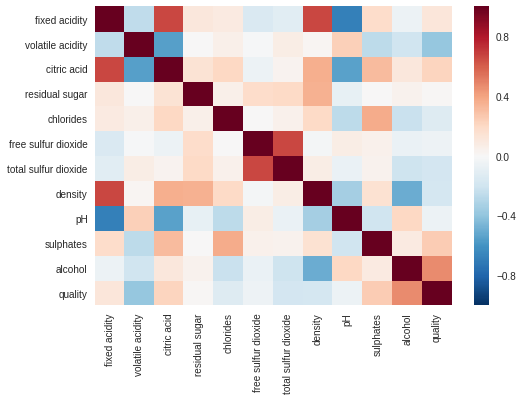

In [0]:
import seaborn as sns

# calculate the correlation matrix
corr = data.corr()
# seaborn의 heatmap 함수를 이용하여 heatmap 표현한다.
sns.heatmap(corr)


### D. Z-변환을 적용하여 데이터 전처리를 수행하고, 위 B번의 통계적 특성의 변화를 확인하세요.

$$\quad$$

분산은 1, 평균은 0이 되고 최대값과 최소값의 차이가 이전보다 줄어들었다.

In [0]:
# Z-변환
std = data.std(axis=0)
mean = data.mean(axis=0)
transformed_data = (data-mean) / std

# z-변환된 데이터의 통계적 특성을 출력한다.
transformed_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,-1.570643e-14,-1.590973e-15,6.045057e-15,-1.344696e-15,5.098590e-15,-7.724347e-17,1.619856e-16,3.772732e-13,-5.937923e-15,-2.175036e-15,2.580411e-14,1.081756e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.136377e+00,-2.277567e+00,-1.391037e+00,-1.162333e+00,-1.603443e+00,-1.422055e+00,-1.230199e+00,-3.537625e+00,-3.699244e+00,-1.935902e+00,-1.898325e+00,-3.264143e+00
25%,-7.004996e-01,-7.696903e-01,-9.290275e-01,-4.530767e-01,-3.711129e-01,-8.484502e-01,-7.438076e-01,-6.075656e-01,-6.549356e-01,-6.380200e-01,-8.661079e-01,-7.875763e-01
50%,-2.410190e-01,-4.367545e-02,-5.634264e-02,-2.402999e-01,-1.798892e-01,-1.792441e-01,-2.574163e-01,1.759533e-03,-7.210449e-03,-2.250577e-01,-2.092427e-01,4.507074e-01
75%,5.056370e-01,6.264921e-01,7.650078e-01,4.340257e-02,5.382858e-02,4.899619e-01,4.721707e-01,5.766445e-01,5.757422e-01,4.238832e-01,6.352984e-01,4.507074e-01
max,4.353787e+00,5.876138e+00,3.742403e+00,9.192806e+00,1.112355e+01,5.365606e+00,7.372847e+00,3.678904e+00,4.526866e+00,7.916200e+00,4.201138e+00,2.927275e+00


### E. 훈련 집합과 시험 집합을 7:3으로 구분하여 선형회귀 모델을 적용하여 와인의 질을 예측 분석해보세요.


In [0]:
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn import metrics  

# Features (Input data)
X = transformed_data.iloc[:, :-1].values
# Quality (Label)
y = transformed_data.iloc[:, -1].values  

# 데이터셋 7:3 구분
X_train, X_test, y_train, y_test \
    = train_test_split(X, y, test_size=0.3, random_state=0)  

# 선형회귀 모델 선언 및 훈련
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

# 와인의 질 예측
y_pred = regressor.predict(X_test)  


# 예측 결과 일부 확인
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
print(df.head(10))

# 예측 성능 평가
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', 
       np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

     Actual  Predicted
0  0.450707   0.174550
1 -0.787576  -0.735739
2  1.688991   1.178979
3  0.450707  -0.311460
4 -0.787576   0.379328
5  0.450707  -0.722407
6 -0.787576  -0.274206
7  0.450707   0.468524
8 -2.025860  -0.978119
9 -0.787576  -0.832669
Mean Absolute Error: 0.6032004091429053
Mean Squared Error: 0.6145350899845006
Root Mean Squared Error: 0.7839228852281968
